前処理

In [28]:
from statistics import pvariance
from matome import*
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 20

#PEペレット小とペレット大、PEビニールの３種類の形態のMPsを含むサンプルと土で比較検討

pem = merge("spem2")#PEペレット大小
pee = merge("spee2")

tm =  merge("akasandn_m2")#土
te = merge("akasandn_e2")

bpm = merge("gpem")#PE培養土
bpe = merge("gpee")

btm = merge("ngarm2")#培養土
bte = merge("ngare2")


pem = mean(pem) 
bpm = mean(bpm)

pee = mean(pee)
bpe = mean(bpe)

tm = mean(tm)
te = mean(te)

btm = mean(btm)
bte = mean(bte)

#順番をモデル作成用とモデル評価用で分ける(今はPCAバラバラになってる)


X = pd.concat([pem,pee,tm,te,bpm,bpe,btm,bte],axis=0) #for PCA
# X = pd.concat([pem,bpm,tm,tm,pee,bpe,te,te],axis=0) #for PLS-DA

#波長選択
X = X.iloc[:,500:1500]#長波長側のノイズを消す

X.shape




(96, 1000)

In [29]:
X.head()

,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,...,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179
faka0.03pe31-2022-08-10-14-52-37-0.csv,0.278338,0.278306,0.278284,0.278268,0.278242,0.278209,0.278177,0.278135,0.278137,0.278173,...,0.372412,0.373165,0.373910,0.374706,0.375486,0.376233,0.377028,0.377835,0.378618,0.379457
faka0.03pe41-2022-08-10-14-57-19-0.csv,0.284283,0.284256,0.284237,0.284219,0.284169,0.284102,0.284073,0.284030,0.284021,0.284059,...,0.374950,0.375710,0.376449,0.377234,0.378002,0.378756,0.379550,0.380355,0.381135,0.381948
faka0.1pe23-2022-08-10-16-06-09-0.csv,0.278724,0.278682,0.278665,0.278663,0.278630,0.278578,0.278563,0.278529,0.278519,0.278553,...,0.372835,0.373590,0.374349,0.375126,0.375886,0.376663,0.377448,0.378230,0.379045,0.379858
faka0.1pe13-2022-08-10-16-02-48-0.csv,0.284184,0.284131,0.284112,0.284116,0.284064,0.284005,0.283989,0.283949,0.283918,0.283952,...,0.374903,0.375654,0.376444,0.377218,0.377961,0.378737,0.379522,0.380291,0.381117,0.381945
0.05kpe_11-2022-10-12-16-27-05-0.csv,0.301493,0.301440,0.301400,0.301405,0.301353,0.301281,0.301261,0.301208,0.301190,0.301178,...,0.390371,0.391130,0.391898,0.392654,0.393396,0.394196,0.395003,0.395827,0.396661,0.397509


Text(0, 0.5, 'Absorbance')

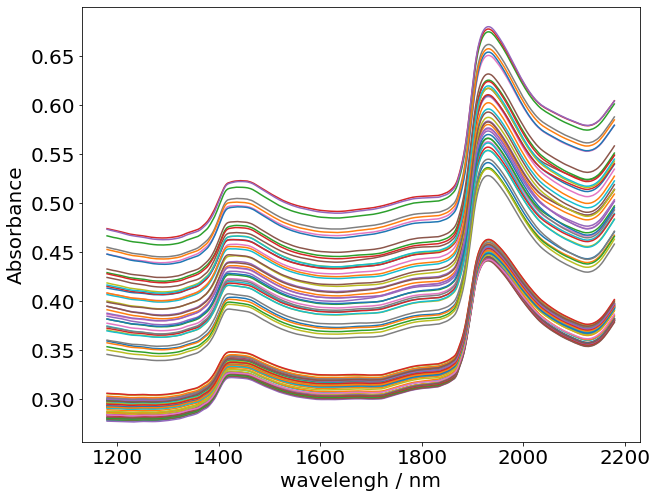

In [30]:
plt.plot(X.T)
plt.xlabel('wavelengh / nm')
plt.ylabel('Absorbance')

In [31]:
#km変換
Xkm = km(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


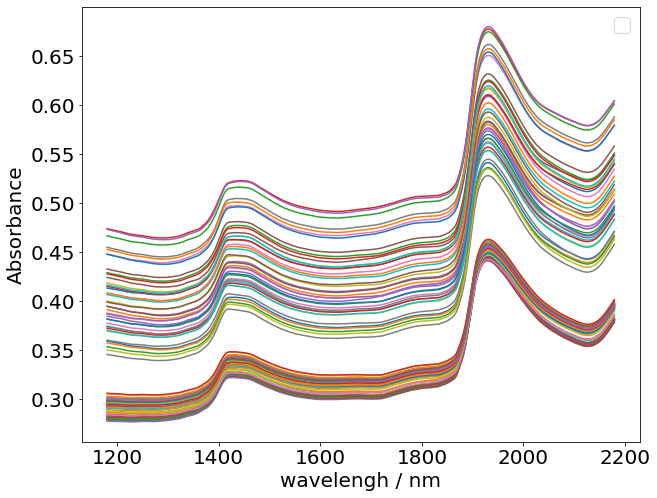

In [32]:
plt.plot(X.T)
plt.xlabel('wavelengh / nm')
plt.ylabel('Absorbance')
plt.legend() #反例がないか調べる

In [33]:
from scipy.signal import savgol_filter

Xsg = savgol_filter(X,window_length=35,polyorder=3,deriv=1)
#窓幅25点、フィッティング3次関数を2次微分
Xsg = pd.DataFrame(Xsg,index=X.index,columns=X.columns)
Xsg.head()

,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,...,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179
faka0.03pe31-2022-08-10-14-52-37-0.csv,-0.000041,-0.000037,-0.000032,-0.000028,-0.000025,-0.000021,-0.000018,-0.000015,-0.000013,-0.000011,...,0.000758,0.000765,0.000771,0.000775,0.000779,0.000782,0.000784,0.000785,0.000786,0.000785
faka0.03pe41-2022-08-10-14-57-19-0.csv,-0.000053,-0.000048,-0.000042,-0.000038,-0.000033,-0.000029,-0.000025,-0.000022,-0.000018,-0.000016,...,0.000757,0.000762,0.000767,0.000771,0.000774,0.000776,0.000777,0.000777,0.000776,0.000774
faka0.1pe23-2022-08-10-16-06-09-0.csv,-0.000041,-0.000036,-0.000032,-0.000028,-0.000024,-0.000021,-0.000018,-0.000015,-0.000013,-0.000011,...,0.000758,0.000764,0.000769,0.000774,0.000777,0.000779,0.000781,0.000782,0.000781,0.000780
faka0.1pe13-2022-08-10-16-02-48-0.csv,-0.000048,-0.000043,-0.000039,-0.000036,-0.000032,-0.000029,-0.000026,-0.000023,-0.000021,-0.000019,...,0.000759,0.000765,0.000769,0.000773,0.000775,0.000777,0.000778,0.000777,0.000776,0.000773
0.05kpe_11-2022-10-12-16-27-05-0.csv,-0.000058,-0.000053,-0.000049,-0.000044,-0.000040,-0.000037,-0.000033,-0.000030,-0.000028,-0.000025,...,0.000772,0.000778,0.000783,0.000787,0.000790,0.000792,0.000794,0.000794,0.000793,0.000791


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


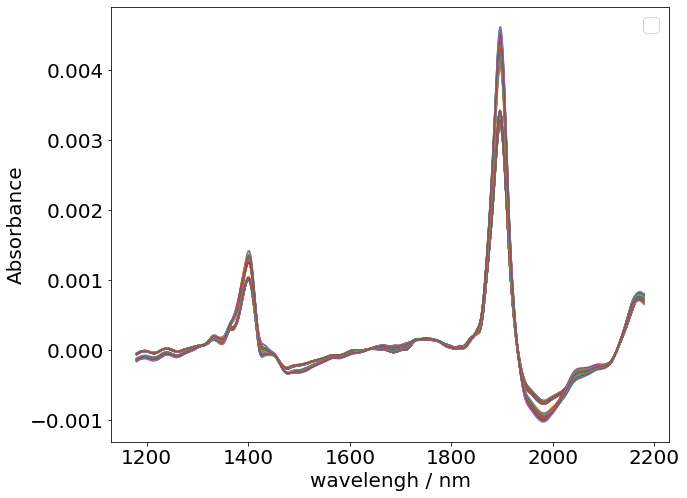

In [34]:
plt.plot(Xsg.T)
plt.xlabel('wavelengh / nm')
plt.ylabel('Absorbance')
plt.legend() #反例がないか調べる

In [35]:
#snv
# Xsnv = snv(Xsg)
# Xsnv.head()

Xsnv = pd.DataFrame(Xsg)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


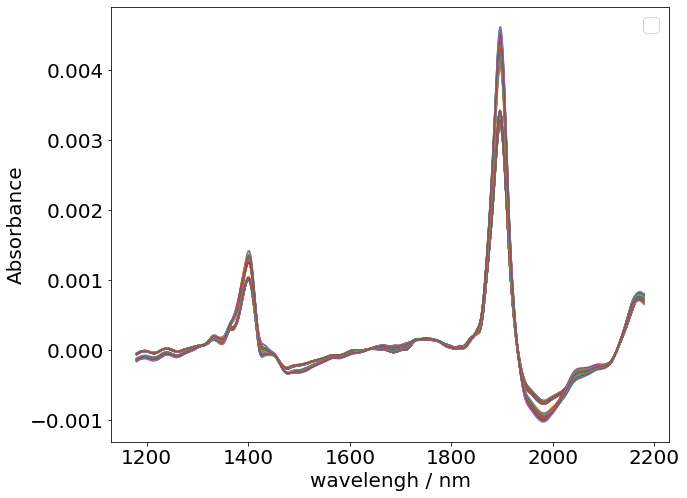

In [36]:
plt.plot(Xsnv.T)
plt.xlabel('wavelengh / nm')
plt.ylabel('Absorbance')
plt.legend() #反例がないか調べる

In [37]:
Xc = cent(Xsnv)
# Xc.head()

In [38]:
# Xc = Xc.iloc[:,0:135] #いい感じに分かれる

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


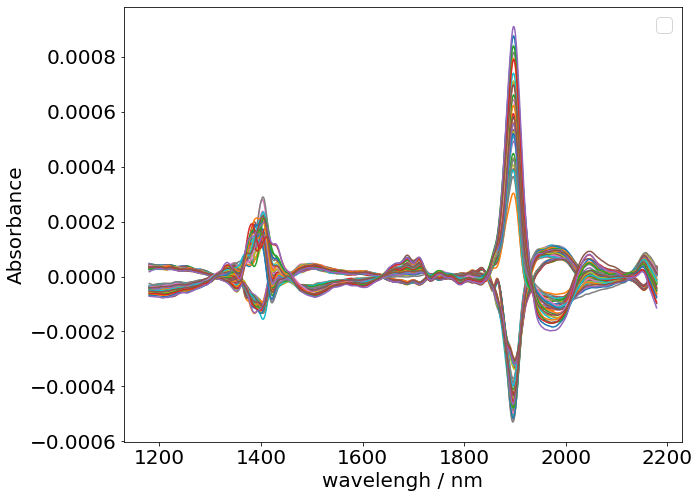

In [39]:
plt.plot(Xc.T);
plt.xlabel('wavelengh / nm')
plt.ylabel('Absorbance')
plt.legend() #反例がないか調べる

In [40]:
Xc.T.to_csv('DS7.csv')

PCA

In [41]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Xc)
feature = pd.DataFrame(pca.transform(Xc))
loading = pd.DataFrame(pca.components_)
feature.index = Xc.index
feature.columns = [f'PC{i+1}' for i in range(len(Xc))]
loading.index = feature.columns
loading.columns = Xc.columns


In [42]:
feature.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96
faka0.03pe31-2022-08-10-14-52-37-0.csv,-0.001914,-0.000170,0.000362,0.000088,0.000022,0.000086,-0.000028,-0.000021,8.995345e-06,-0.000038,...,3.468943e-07,-1.435098e-06,9.254673e-08,-1.008361e-06,-9.925560e-07,-2.097890e-07,3.318109e-07,6.634947e-07,-3.626971e-07,9.910285e-20
faka0.03pe41-2022-08-10-14-57-19-0.csv,-0.001955,-0.000179,0.000331,0.000105,-0.000038,-0.000013,0.000016,0.000005,-9.644854e-07,0.000036,...,-4.890226e-07,-2.200915e-06,5.232095e-07,-3.839556e-08,8.295791e-07,-2.990333e-07,-1.015528e-07,-3.122786e-07,1.318445e-06,-7.056631e-18
faka0.1pe23-2022-08-10-16-06-09-0.csv,-0.001828,-0.000131,0.000330,0.000149,0.000032,0.000078,-0.000028,-0.000026,-1.636537e-06,-0.000023,...,-9.512867e-07,-4.892327e-07,2.799341e-07,2.304012e-07,3.461598e-07,7.428462e-08,1.819621e-07,6.428164e-07,-4.199777e-07,7.377657e-19
faka0.1pe13-2022-08-10-16-02-48-0.csv,-0.001825,-0.000193,0.000342,0.000117,-0.000007,-0.000016,-0.000015,-0.000033,-8.802917e-06,0.000032,...,1.879540e-08,2.708590e-07,6.434090e-07,-8.235424e-07,6.748348e-07,1.046035e-06,-2.230752e-07,-2.980670e-07,3.791747e-07,1.821121e-19
0.05kpe_11-2022-10-12-16-27-05-0.csv,-0.002289,-0.000004,-0.000151,-0.000014,-0.000156,-0.000061,0.000068,-0.000024,7.968935e-06,0.000012,...,1.397800e-06,1.448987e-06,6.046550e-07,-2.824833e-07,1.953290e-07,4.288645e-08,-6.916801e-07,-4.692381e-07,-2.563985e-07,-1.355253e-19


In [43]:
pe = pd.DataFrame(feature.iloc[0:36,:])#pe 粒径小 18*2
t = pd.DataFrame(feature.iloc[36:56,:])# 20



bpe = pd.DataFrame(feature.iloc[56:78,:])#pe ビニ 16*2
bt = pd.DataFrame(feature.iloc[78:96,:])# 20




In [44]:
t.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96
saka_11-2022-10-11-16-54-41-0.csv,-0.002753,0.000260,-0.000115,-0.000162,0.000068,0.000103,-0.000040,-0.000012,-1.278197e-05,-0.000013,...,7.287298e-07,6.263651e-08,-2.089375e-07,3.867773e-07,-1.097328e-07,-2.138097e-07,8.702988e-07,-2.995521e-07,-1.182970e-08,3.388132e-21
saka_21-2022-10-11-17-03-32-0.csv,-0.002745,0.000291,-0.000213,-0.000133,0.000048,0.000041,-0.000067,-0.000048,-2.751519e-05,0.000020,...,-6.807562e-07,-1.138994e-06,-4.206657e-07,-4.259436e-07,5.750907e-07,-2.903318e-07,-9.989671e-07,-5.662229e-07,7.144441e-07,-3.388132e-20
saka_31-2022-10-11-17-08-38-0.csv,-0.002559,0.000249,-0.000167,-0.000166,0.000062,0.000111,-0.000095,-0.000068,-2.191186e-05,-0.000002,...,-4.919983e-07,6.005043e-07,-5.934157e-07,-1.287589e-07,1.951373e-07,-2.683359e-07,2.808151e-07,5.665057e-07,1.589909e-08,-3.947174e-19
saka_41-2022-10-11-17-16-05-0.csv,-0.002773,0.000119,-0.000039,-0.000149,-0.000117,0.000039,0.000047,0.000123,8.761495e-07,0.000036,...,-3.144246e-07,-8.272919e-07,-7.730074e-07,-2.349485e-07,-6.052663e-07,-9.645200e-07,-4.718094e-07,3.543044e-08,-6.992426e-07,-1.355253e-19
saka_51-2022-10-11-17-21-26-0.csv,-0.002551,0.000152,-0.000018,-0.000040,0.000037,0.000068,0.000021,0.000123,-4.039341e-06,-0.000006,...,1.353337e-06,8.527815e-07,-1.833539e-06,-5.536454e-07,-7.420027e-07,-1.489012e-07,4.572501e-08,5.593981e-08,1.336377e-06,1.202787e-19


In [45]:
#feature.to_csv('plasticsF.csv')
# loading.to_csv('ryumix_L.csv')

Text(0, 0.5, 'PC2')

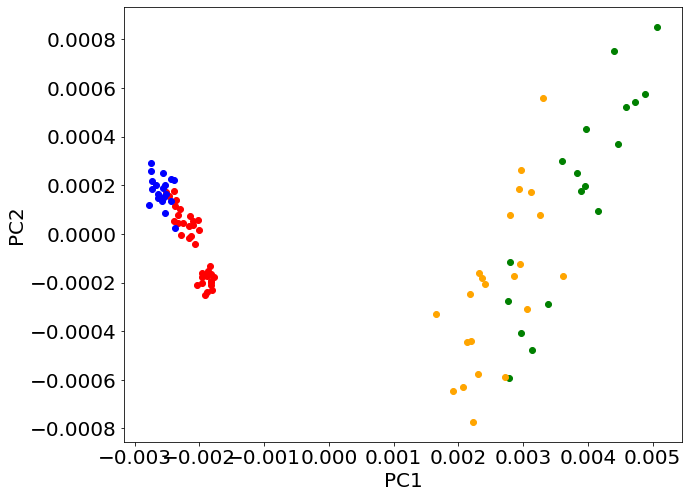

In [46]:
#データの可視化

x = 1 #x軸の主成分
y = 2 #y軸の主成分 

plt.scatter(pe[f'PC{x}'],pe[f'PC{y}'],c="red")
plt.scatter(bt[f'PC{x}'],bt[f'PC{y}'],c="green")
plt.scatter(bpe[f'PC{x}'],bpe[f'PC{y}'],c="orange")
plt.scatter(t[f'PC{x}'],t[f'PC{y}'],c="blue")



plt.xlabel(f'PC{x}')
plt.ylabel(f'PC{y}')

Text(0, 0.5, 'PC3')

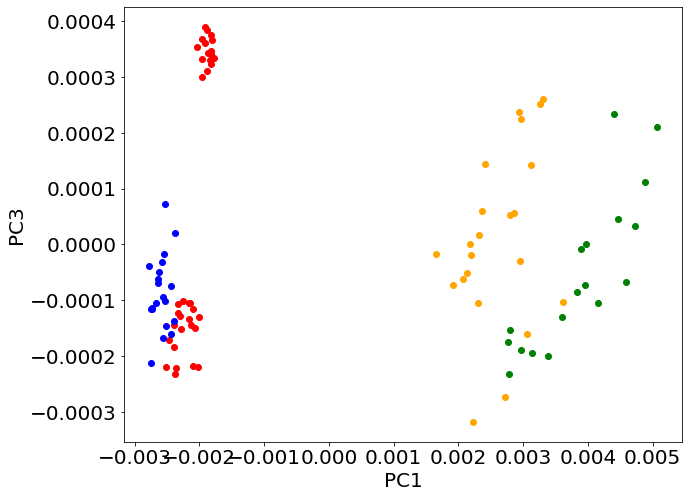

In [47]:
#データの可視化

x = 1 #x軸の主成分
y = 3 #y軸の主成分 

plt.scatter(pe[f'PC{x}'],pe[f'PC{y}'],c="red")
plt.scatter(bt[f'PC{x}'],bt[f'PC{y}'],c="green")
plt.scatter(bpe[f'PC{x}'],bpe[f'PC{y}'],c="orange")
plt.scatter(t[f'PC{x}'],t[f'PC{y}'],c="blue")



plt.xlabel(f'PC{x}')
plt.ylabel(f'PC{y}')

In [48]:
#寄与率
import pandas as pd
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(Xc))])

,0
PC1,9.755955e-01
PC2,1.144074e-02
PC3,4.849309e-03
PC4,3.362804e-03
PC5,1.941534e-03
...,...
PC92,8.040958e-08
PC93,7.124216e-08
PC94,6.341428e-08
PC95,5.337311e-08
